# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [7]:
# Get the empty lists to store the values of each
country = []
city_list = []
date = []
max_temperature = []
cloudiness = []
humidity = []
latitude = []
longitude = []
wind_speed = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
print("Beginning Data Retrieval")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Create a loop for all cities
i = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q" + city
    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='
                                   f'{city}&units=imperial').json()
    
    try:
        country.append(response["sys"]["country"])
        city_list.append(response["name"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record : {i}|{city}") 
        i+=1
  
    except(KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record : 1|port elizabeth
Processing Record : 2|komsomolskiy
Processing Record : 3|tiksi
Processing Record : 4|cabinda
Processing Record : 5|quatre cocos
Processing Record : 6|constitucion
Processing Record : 7|ushuaia
Processing Record : 8|monte alegre de sergipe
Processing Record : 9|avarua
Processing Record : 10|east london
Processing Record : 11|tuktoyaktuk
Processing Record : 12|gizo
Processing Record : 13|sao lourenco
Processing Record : 14|singkang
Processing Record : 15|clyde river
Processing Record : 16|road town
Processing Record : 17|kahului
Processing Record : 18|dikson
Processing Record : 19|saint anthony
Processing Record : 20|itarema
Processing Record : 21|nikolskoye
Processing Record : 22|bethel
Processing Record : 23|bud
Processing Record : 24|georgetown
City not found. Skipping...
Processing Record : 25|santa vitoria do palmar
Processing Record : 26|torbay
Processing Record : 27|punta arenas
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# country = []
# city_list = []
# date = []
# max_temperature = []
# cloudiness = []
# humidity = []
# latitude = []
# longitude = []
# wind_speed = []
weather_df = pd.DataFrame ({
    "Country" : country,
    "City" : city_list,
    "Date" : date,
    "Max Temp" : max_temperature,
    "Cloudiness" : cloudiness,
    "Humidity" : humidity,
    "Lat" : latitude,
    "Lng" : longitude,
    "Wind Speed" : wind_speed 
})
weather_df

,Country,City,Date,Max Temp,Cloudiness,Humidity,Lat,Lng,Wind Speed
0,ZA,Port Elizabeth,1651623820,65.32,0,93,-33.9180,25.5701,10.36
1,UZ,Yangi Marg`ilon,1651623847,68.72,100,60,40.4272,71.7189,4.61
2,RU,Tiksi,1651623790,15.66,52,87,71.6872,128.8694,3.74
3,AO,Cabinda,1651623847,78.19,84,91,-5.5500,12.2000,5.35
4,MU,Quatre Cocos,1651623848,75.31,39,81,-20.2078,57.7625,10.29
...,...,...,...,...,...,...,...,...,...
595,SO,Hobyo,1651624160,81.37,82,68,5.3505,48.5268,10.76
596,TJ,Obigarm,1651624161,56.03,100,91,38.7173,69.7088,6.20
597,CN,Baoning,1651624161,60.66,0,88,25.3378,110.0260,0.00
598,VN,Tam Ky,1651624162,71.98,100,85,15.5667,108.4833,5.95


In [11]:
weather_df.count()

Country       600
City          600
Date          600
Max Temp      600
Cloudiness    600
Humidity      600
Lat           600
Lng           600
Wind Speed    600
dtype: int64

In [12]:
# Export to csv
weather_df.to_csv("../output_files/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

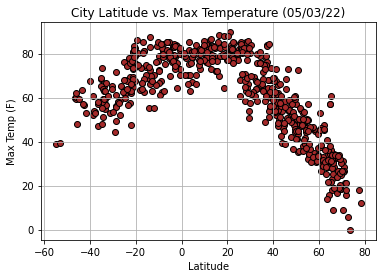

In [13]:
# Create scatter plot Latitude vs. Temperature Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "brown", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Max Temperature (05/03/22)")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_files/LatvsTempplot")

plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

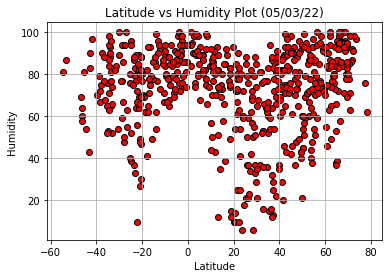

In [14]:
# Create scatter plot Latitude vs. Humidity Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "red", edgecolor = "black")

plt.grid()

plt.title("Latitude vs Humidity Plot (05/03/22)")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

plt.savefig("../output_files/LatvsHumidity")

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

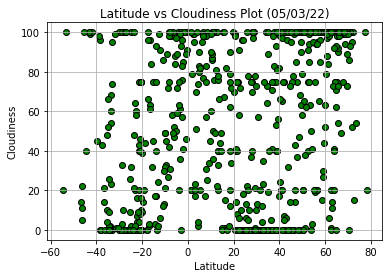

In [15]:
# Create scatter plot Latitude vs. Cloudiness Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "green", edgecolor = "black")

plt.grid()

plt.title("Latitude vs Cloudiness Plot (05/03/22)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.savefig("../output_files/LatvsCloudiness")

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

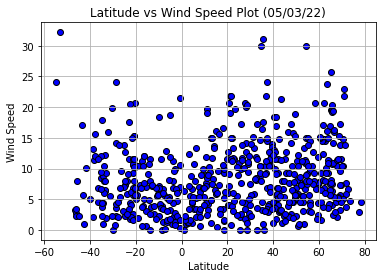

In [16]:
# Create scatter plot Latitude vs. Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")

plt.grid()

plt.title("Latitude vs Wind Speed Plot (05/03/22)")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.savefig("../output_files/LatvsWindSpeed")

plt.show

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[weather_df["Lat"] >=0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

In [18]:
def linear_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values,"r-")
    
    plt.annotate(line_eq,(x_values.median(),y_values.median()), fontsize=14, color="red")
    
    print(f"The r-value is: {rvalue}")
    
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8922388723855534
y = -0.91x + 93.68


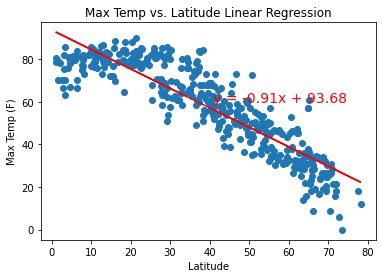

In [19]:
x_values = north_hemi["Lat"]

y_values = north_hemi["Max Temp"]

plt.title("Max Temp vs. Latitude Linear Regression")

plt.ylabel("Max Temp (F)")

plt.xlabel("Latitude")

plt.show

print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7141004156566751
y = 0.61x + 81.62


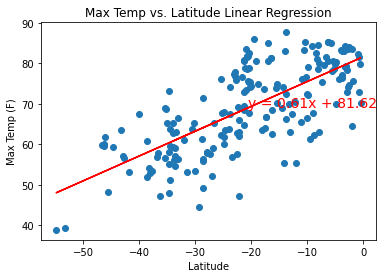

In [20]:
x_values = south_hemi["Lat"]

y_values = south_hemi["Max Temp"]

plt.title("Max Temp vs. Latitude Linear Regression")

plt.ylabel("Max Temp (F)")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15693230227192645
y = 0.17x + 64.78


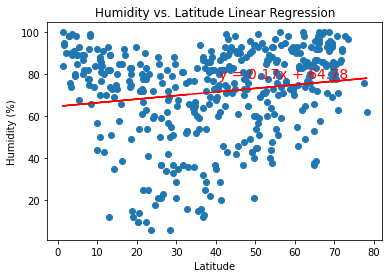

In [21]:
x_values = north_hemi["Lat"]

y_values = north_hemi["Humidity"]

plt.title("Humidity vs. Latitude Linear Regression")

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22407127021765424
y = 0.28x + 82.19


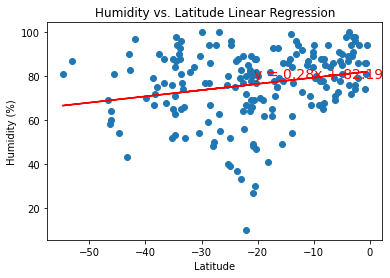

In [22]:
x_values = south_hemi["Lat"]

y_values = south_hemi["Humidity"]

plt.title("Humidity vs. Latitude Linear Regression")

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22769134324057388
y = 0.44x + 42.94


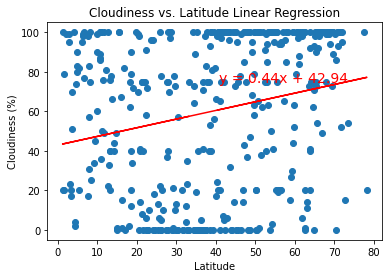

In [23]:
x_values = north_hemi["Lat"]

y_values = north_hemi["Cloudiness"]

plt.title("Cloudiness vs. Latitude Linear Regression")

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28389898895854787
y = 0.84x + 61.24


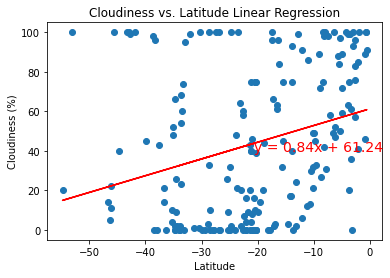

In [24]:
x_values = south_hemi["Lat"]

y_values = south_hemi["Cloudiness"]

plt.title("Cloudiness vs. Latitude Linear Regression")

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1533090681539232
y = 0.04x + 7.04


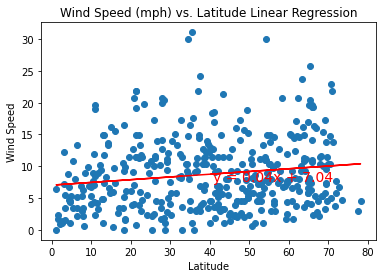

In [25]:
x_values = north_hemi["Lat"]

y_values = north_hemi["Wind Speed"]

plt.title("Wind Speed (mph) vs. Latitude Linear Regression")

plt.ylabel("Wind Speed")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23139650779883297
y = -0.1x + 5.11


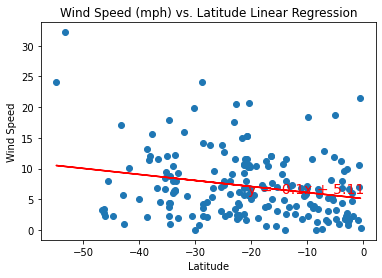

In [26]:
x_values = south_hemi["Lat"]

y_values = south_hemi["Wind Speed"]

plt.title("Wind Speed (mph) vs. Latitude Linear Regression")

plt.ylabel("Wind Speed")

plt.xlabel("Latitude")

print(linear_reg(x_values, y_values))